In [6]:
import subprocess
import time
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
mpl.rcParams['pdf.fonttype'] = 42

In [219]:
!mkdir -p ../ne_estimates/

Running GONE2 and CurrentNE2 using VCFs for each geographic region/cluster using low coverage mode since we are dealing with non-called genotypes. If this were called genotoypes, the `gonedatatype` would have to be changed.

In [10]:
for region in ["Curacao", "Belize", "Florida", "USVI"]:
    task = "ne_estimate_single"
    mem = "128"
    cpus = "20"
    inprefix = "../data/allsamples.split." + region + ".filtered"
    outprefix = "../ne_estimates/" + region
    recombrate = "3.285"
    gonedatatype = "3"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../scripts/" + task + ".sh " + 
         inprefix + " " + outprefix + " " + recombrate + " " + gonedatatype ], shell=True)

Submitted batch job 8122959
Submitted batch job 8122960
Submitted batch job 8122961
Submitted batch job 8122962


In [22]:
%%bash
cd ../ne_estimates
for region in Curacao Florida USVI Belize; do
    cat ./${region} | grep "Ne point" -A9 | head -10 | grep -v "^#" > ./${region}_CIs.txt
done

In [10]:
gbr_colors = ["#FF6A5D", "#00A9A6", "#006B8E", "#A3D9A5"]

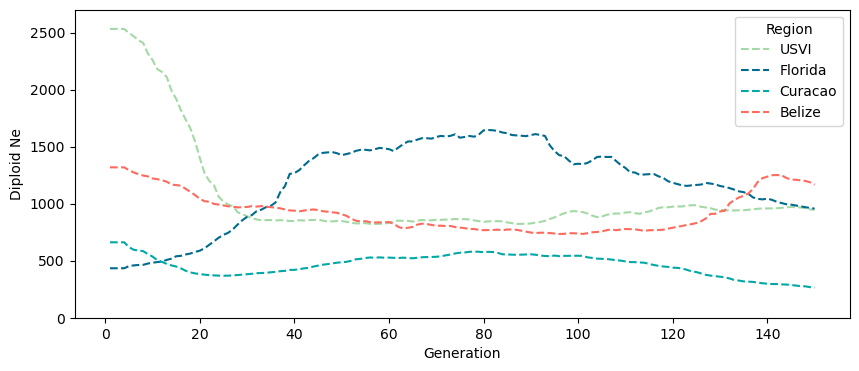

In [70]:
ne = pd.read_csv("../ne_estimates/USVI_GONE2_Ne", sep = "\t")
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = ne, x = "Generation", y = "Ne_diploids", ax = ax, color = "#A3D9A5", linestyle="--", label = "USVI")
ne = pd.read_csv("../ne_estimates/Florida_GONE2_Ne", sep = "\t")
sns.lineplot(data = ne, x = "Generation", y = "Ne_diploids", ax = ax, color = "#006B8E", linestyle="--", label = "Florida")
ne = pd.read_csv("../ne_estimates/Curacao_GONE2_Ne", sep = "\t")
sns.lineplot(data = ne, x = "Generation", y = "Ne_diploids", ax = ax, color = "#00A9A6", linestyle="--", label = "Curacao")
ne = pd.read_csv("../ne_estimates/Belize_GONE2_Ne", sep = "\t")
sns.lineplot(data = ne, x = "Generation", y = "Ne_diploids", ax = ax, color = "#FF6A5D", linestyle="--", label = "Belize")
plt.ylabel("Diploid Ne")
plt.ylim(0, 2700)
plt.legend(title="Region")

In [23]:
for region in ["Florida", "Curacao", "Belize", "USVI"]:
    currentne = pd.read_csv("../ne_estimates/" + region + "_CIs.txt", sep = "\t", header = None)
    print(region, currentne[0][0])

Florida 1197.76
Curacao 800.8
Belize 2627.68
USVI 1372.93
